In [1]:
from nuscenes import NuScenes
from nuscenes.prediction import PredictHelper
from nuscenes.eval.prediction.splits import get_prediction_challenge_split

import matplotlib.pyplot as plt

# This is the path where you stored your copy of the nuScenes dataset.
DATAROOT = 'Dataset/'

history_length = 2
prediction_length = 6

# Use v1.0-trainval or v1.0-mini
nusc = NuScenes('v1.0-trainval', dataroot=DATAROOT, verbose=False)
helper = PredictHelper(nusc)

In [25]:
# 0 - human.pedestrian.adult
# 1 - human.pedestrian.child
# 8 - vehicle.car
# 9 - vehicle.motorcycle
# 10 - vehicle.bicycle

target_category = nusc.category[0]
target_category_token = target_category['token']

target_category

{'token': '1fa93b757fc74fb197cdd60001ad8abf',
 'name': 'human.pedestrian.adult',
 'description': 'Adult subcategory.'}

In [26]:
all_instances = nusc.instance
len(all_instances)

64386

In [27]:
# In seconds from both sides
min_nbrs_annotations = prediction_length * 2 + history_length * 2
min_nbrs_annotations

16

In [28]:
sorted_instances = []

for instance in all_instances:
    if instance['category_token'] != target_category_token:
        continue
    
    sorted_instances.append(instance)

In [29]:
len(sorted_instances)

10690

### Создание train-списка вида "instanceToken_sampleToken"

In [37]:
def GetTrainSamplesFromInstance(instance_token, all_annotations):
    # Split between train samples
    # The minimum difference (amount annotations) between two train samples of the same instance
    split = int(5 * 2) # 1 seconds
    
    all_samples = []
    
    print(f"Start: {history_length * 2}; Total len {len(all_annotations)} step: {split}")
    for i in range(history_length * 2, len(all_annotations), split):
        print(f"Iter: {i};")
        
        sample_token = all_annotations[i]['sample_token']
        
        past = helper.get_past_for_agent(instance_token, sample_token, history_length, in_agent_frame=True)
        future = helper.get_future_for_agent(instance_token, sample_token, prediction_length, in_agent_frame=True)
        
        if len(past) != 4 or len(future) != 12:
            print("It didn't work out")
        else:
            all_samples.append(f"{instance_token}_{sample_token}")
            print("It works!")
    
    return all_samples

In [38]:
train_list = []

for instance in sorted_instances:
#for i in range(1):
    #instance = sorted_instances[330]
    # Get first agent's sample token
    target_instance_token = instance['token']
    first_appearance_sample_token = nusc.get('sample_annotation', instance['first_annotation_token'])['sample_token']

    # Check if exist enough annotations
    all_annotations = helper.get_future_for_agent(target_instance_token,
                                                  first_appearance_sample_token,
                                                  seconds=9999,
                                                  in_agent_frame=False,
                                                  just_xy=False)
    
    # To get best data - remove first and last seconds of this instance
    # Remove first element from list    
    all_annotations = all_annotations[1:]
    
    # Remove last 1 elements from list
    all_annotations = all_annotations[: len(all_annotations) - 1]
    
    
    amount_of_annotations = len(all_annotations)
    
    # If not enough amount of annotations => continue
    print(f"{amount_of_annotations}")
    if amount_of_annotations <= min_nbrs_annotations:
        continue
        
    samples = GetTrainSamplesFromInstance(target_instance_token, all_annotations)
    
    for sample in samples:
        train_list.append(sample)

11
21
Start: 4; Total len 21 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
5
10
11
14
2
20
Start: 4; Total len 20 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
36
Start: 4; Total len 36 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
1
5
35
Start: 4; Total len 35 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
Iter: 34;
It didn't work out
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
20
Start: 4; Total len 20 step: 10
Iter: 4;
It didn't work out
Iter: 14;
It didn't work out
20
Start: 4; Total len 20 step: 10
Iter: 4;
It didn't work out
Iter: 14;
It didn't work out
35
Sta

It didn't work out
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
2
29
Start: 4; Total len 29 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
15
11
21
Start: 4; Total len 21 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
6
3
10
13
1
10
34
Start: 4; Total len 34 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
1
8
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
4
14
3
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
16
35
Start: 4; Total len 35 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
Iter: 34;
It didn't work out
8
19
Start: 4; Total len 19 ste

It didn't work out
Iter: 24;
It didn't work out
38
Start: 4; Total len 38 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
26
Start: 4; Total len 26 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
33
Start: 4; Total len 33 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
0
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
4
19
Start: 4; Total len 19 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
0
36
Start: 4; Total len 36 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
27
Start: 4; Total len 27 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
22
Start: 4; Total len 22 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
24
Start: 4; Total len 24 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
26
Start: 4; Total 

Iter: 4;
It works!
Iter: 14;
It didn't work out
0
20
Start: 4; Total len 20 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
31
Start: 4; Total len 31 step: 10
Iter: 4;
It didn't work out
Iter: 14;
It works!
Iter: 24;
It didn't work out
0
26
Start: 4; Total len 26 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
11
24
Start: 4; Total len 24 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
0
7
1
9
12
2
12
7
4
10
14
2
8
17
Start: 4; Total len 17 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
18
Start: 4; Total len 18 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
21
Start: 4; Total len 21 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
28
Start: 4; Total len 28 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
19
Start: 4; Total len 19 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
6
30
Start: 4; Total len 30 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't wor

It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
30
Start: 4; Total len 30 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
1
4
10
26
Start: 4; Total len 26 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
10
18
Start: 4; Total len 18 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
1
24
Start: 4; Total len 24 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
19
Start: 4; Total len 19 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
29
Start: 4; Total len 29 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
28
Start: 4; Total len 28 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
4
18
Start: 4; Total l

It didn't work out
16
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
23
Start: 4; Total len 23 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
36
Start: 4; Total len 36 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
4
36
Start: 4; Total len 36 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
31
Start: 4; Total len 31 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
36
Start: 4; Total len 36 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
1
3
5
19
Start: 4; Total len 19 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
30
Start: 4; Total len 30 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It

It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
32
Start: 4; Total len 32 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
33
Start: 4; Total len 33 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
36
Start: 4; Total len 36 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
8
34
Start: 4; Total len 34 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
12
35
Start: 4; Total len 35 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
Iter: 34;
It didn't work out
34
Start: 4; Total len 34 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
6
3

It works!
Iter: 34;
It didn't work out
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
29
Start: 4; Total len 29 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
24
Start: 4; Total len 24 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
33
Start: 4; Total len 33 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
21
Start: 4; Total len 21 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
17
Start: 4; Total len 17 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
14
4
2
30
Start: 4; Total len 30 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
5
21
Start: 4; Total len 21

It works!
Iter: 34;
It didn't work out
5
5
35
Start: 4; Total len 35 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
Iter: 34;
It didn't work out
30
Start: 4; Total len 30 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
36
Start: 4; Total len 36 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
33
Start: 4; Total len 33 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
20
Start: 4; Total len 20 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
2
35
Start: 4; Total len 35 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
Iter: 34;
It didn't work out
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
19
Start: 4; Total len 19 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
14
31
Start: 4; Total len 31 step: 10
Iter: 4;
It works!
Iter: 14;
It wor

It didn't work out
Iter: 34;
It didn't work out
31
Start: 4; Total len 31 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
3
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
32
Start: 4; Total len 32 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
26
Start: 4; Total len 26 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
4
33
Start: 4; Total len 33 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
36
Start: 4; Total len 36 step: 10
Iter: 4;


It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
19
Start: 4; Total len 19 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
31
Start: 4; Total len 31 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
33
Start: 4; Total len 33 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
29
Start: 4; Total len 29 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
34
Start: 4; Total len 34 step: 10
It

It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
9
28
Start: 4; Total len 28 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
3
18
Start: 4; Total len 18 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
1
12
14
11
0
4
7
0
0
0
11
4
7
0
0
3
2
22
Start: 4; Total len 22 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
17
Start: 4; Total len 17 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
27
Start: 4; Total len 27 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
2
31
Start: 4; Total len 31 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
0
4
9
21
Start: 4; Total len 21 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
6
19
Start: 4; Total len 19 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
0
8
2
7
2
29
Start: 4; Total len 29 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
7
8
19
Start: 4; Total len 19 step: 10
Iter: 4;
It w

It works!
Iter: 24;
It didn't work out
17
Start: 4; Total len 17 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
11
9
18
Start: 4; Total len 18 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
2
8
12
9
25
Start: 4; Total len 25 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
Iter: 24;
It didn't work out
8
0
17
Start: 4; Total len 17 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
21
Start: 4; Total len 21 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
2
6
11
21
Start: 4; Total len 21 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
24
Start: 4; Total len 24 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
29
Start: 4; Total len 29 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
19
Start: 4; Total len 19 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
10
12
10
19
Start: 4; Total len 19 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
14
19
Start: 4; Total len 19 step: 10
Iter: 4;
I

It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
18
Start: 4; Total len 18 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
9
9
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
9
36
Start: 4; Total len 36 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
11
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
20
Start: 4; Total len 20 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
17
Start: 4; Total len 17 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
18
Start: 4; Total len 18 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
5
31
Start: 4; Total len 31 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It

It works!
Iter: 24;
It didn't work out
30
Start: 4; Total len 30 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
0
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
35
Start: 4; Total len 35 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
Iter: 34;
It didn't work out
36
Start: 4; Total len 36 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It di

It didn't work out
31
Start: 4; Total len 31 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
23
Start: 4; Total len 23 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
9
29
Start: 4; Total len 29 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
27
Start: 4; Total len 27 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
33
Start: 4; Total len 33 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
2
3
6
0
6
17
Start: 4; Total len 17 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
11
10
18
Start: 4; Total len 18 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
3
3
27
Start: 4; Total len 27 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
13
0
16
0
22
Start: 4; Total len 22 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
1
13
1
6
1
38
Start: 4; Total len 38 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It work

It didn't work out
1
6
14
18
Start: 4; Total len 18 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
36
Start: 4; Total len 36 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
6
2
29
Start: 4; Total len 29 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
25
Start: 4; Total len 25 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
Iter: 24;
It didn't work out
22
Start: 4; Total len 22 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
19
Start: 4; Total len 19 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
25
Start: 4; Total len 25 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
Iter: 24;
It didn't work out
9
6
7
24
Start: 4; Total len 24 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
12
13
24
Start: 4; Total len 24 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
10
17
Start: 4; Total len 17 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
22
Star

It works!
Iter: 34;
It didn't work out
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
17
Start: 4; Total len 17 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
26
Start: 4; Total len 26 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
9
23
Start: 4; Total len 23 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
5
1
24
Start: 4; Total len 24 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
8
12
0
4
3
1
4
24
Start: 4; Total len 24 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
5
4
8
3
2
38
Start: 4; Total len 38 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
0
4
19
Start: 4; Total len 19 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
0
10
5
18
Start: 4; Total len 18 step: 

It didn't work out
38
Start: 4; Total len 38 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
31
Start: 4; Total len 31 step: 10
Iter: 4;
It didn't work out
Iter: 14;
It works!
Iter: 24;
It didn't work out
32
Start: 4; Total len 32 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
Iter: 24;
It didn't work out
3
34
Start: 4; Total len 34 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
Iter: 24;
It didn't work out
38
Start: 4; Total len 38 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
38
Start: 4; Total len 38 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
38
Start: 4; Total len 38 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
38
Start: 4; Total len 38 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
37
Start: 4; Total len 37 st

It didn't work out
13
34
Start: 4; Total len 34 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
30
Start: 4; Total len 30 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
35
Start: 4; Total len 35 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
Iter: 34;
It didn't work out
33
Start: 4; Total len 33 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
32
Start: 4; Total len 32 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
28
Start: 4; Total len 28 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
32
Start: 4; Total len 32 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
10
29
Start: 4; Total len 29 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
12
34
Start: 4; Total len 34 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
34
Start: 4; Tot

It didn't work out
7
33
Start: 4; Total len 33 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
17
Start: 4; Total len 17 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
23
Start: 4; Total len 23 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
32
Start: 4; Total len 32 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
20
Start: 4; Total len 20 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
24
Start: 4; Total len 24 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
30
Start: 4; Total len 30 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
30
Start: 4; Total len 30 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
17
Start: 4; Total len 17 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
24
Start: 4; Total len 24 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
38
Start: 4; Total len 38 step: 10
Iter: 4;
It works!
Iter: 14;
It wo

It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
32
Start: 4; Total len 32 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
18
Start: 4; Total len 18 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
24
Start: 4; Total len 24 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
7
4
17
Start: 4; Total len 17 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
25
Start: 4; Total len 25 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
Iter: 24;
It didn't work out
0
15
15
25
Start: 4; Total len 25 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
Iter: 24;
It didn't work out
11
14
11
32
Start: 4; Total len 32 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
7
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
35
Start: 4; Total len 35 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
Iter: 34;
It 

It works!
Iter: 34;
It didn't work out
25
Start: 4; Total len 25 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
Iter: 24;
It didn't work out
13
15
20
Start: 4; Total len 20 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
38
Start: 4; Total len 38 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
21
Start: 4; Total len 21 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
28
Start: 4; Total len 28 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
2
2
4
36
Start: 4; Total len 36 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
25
Start: 4; Total len 25 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
Iter: 24;
It didn't work out
24
Start: 4; Total len 24 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
12
38
Start: 4; Total len 38 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
3

It works!
Iter: 34;
It didn't work out
36
Start: 4; Total len 36 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
29
Start: 4; Total len 29 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
9
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
1
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
12
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't

It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
29
Start: 4; Total len 29 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
38
Start: 4; Total len 38 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
12
16
3
38
Start: 4; Total len 38 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
25
Start: 4; Total len 25 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
Iter: 24;
It didn't work out
38
Start: 4; Total len 38 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
1
0
10
4
0
2
14
4
6
9
0
8
9
17
Start: 4; Total len 17 step: 10
Iter: 4;
It works!
I

20
Start: 4; Total len 20 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
19
Start: 4; Total len 19 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
28
Start: 4; Total len 28 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
11
18
Start: 4; Total len 18 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
21
Start: 4; Total len 21 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
19
Start: 4; Total len 19 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
20
Start: 4; Total len 20 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
25
Start: 4; Total len 25 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
Iter: 24;
It didn't work out
28
Start: 4; Total len 28 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
17
Start: 4; Total len 17 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
1
9
17
Start: 4; Total len 17 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
17
Start: 4

It works!
Iter: 24;
It didn't work out
16
25
Start: 4; Total len 25 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
Iter: 24;
It didn't work out
2
31
Start: 4; Total len 31 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
5
27
Start: 4; Total len 27 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
1
10
10
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
23
Start: 4; Total len 23 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
3
9
10
0
20
Start: 4; Total len 20 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
10
6
15
20
Start: 4; Total len 20 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
21
Start: 4; Total len 21 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
19
Start: 4; Total len 19 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
35
Start: 4; Total len 35 step: 10
Iter: 4;
It works!
Iter: 14;
It works!

It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
16
31
Start: 4; Total len 31 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
25
Start: 4; Total len 25 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
Iter: 24;
It didn't work out
33
Start: 4; Total len 33 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
31
Start: 4; Total len 31 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
35
Start: 4; Total len 35 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
Iter: 34;
It didn't work out
13
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
26
Start: 4; 

It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
38
Start: 4; Total len 38 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
17
Start: 4; Total len 17 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
2
12
15
15
10
15
13
9
13
10
29
Start: 4; Total len 29 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
0
11
0
0
3
26
Start: 4; Total len 26 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
8
0
13
7
0
12
20
Start: 4; Total len 20 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
0
0
0
20
Start: 4; Total len 20 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
8
5
9
38
Start: 4; Total len 38 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
0
38
Start: 4; Total len 38 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
7
32
Start: 4; Total len 32 st

It didn't work out
36
Start: 4; Total len 36 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
14
29
Start: 4; Total len 29 step: 10
Iter: 4;
It didn't work out
Iter: 14;
It works!
Iter: 24;
It didn't work out
23
Start: 4; Total len 23 step: 10
Iter: 4;
It didn't work out
Iter: 14;
It didn't work out
13
31
Start: 4; Total len 31 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
22
Start: 4; Total len 22 step: 10
Iter: 4;
It didn't work out
Iter: 14;
It didn't work out
30
Start: 4; Total len 30 step: 10
Iter: 4;
It didn't work out
Iter: 14;
It works!
Iter: 24;
It didn't work out
22
Start: 4; Total len 22 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
13
16
23
Start: 4; Total len 23 step: 10
Iter: 4;
It didn't work out
Iter: 14;
It didn't work out
19
Start: 4; Total len 19 step: 10
It

It works!
Iter: 14;
It didn't work out
18
Start: 4; Total len 18 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
11
6
18
Start: 4; Total len 18 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
12
11
6
12
5
7
0
12
8
37
Start: 4; Total len 37 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It works!
Iter: 34;
It didn't work out
16
15
4
16
10
11
10
10
35
Start: 4; Total len 35 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
Iter: 34;
It didn't work out
19
Start: 4; Total len 19 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
12
6
13
8
16
11
4
23
Start: 4; Total len 23 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
13
9
31
Start: 4; Total len 31 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
Iter: 24;
It didn't work out
16
25
Start: 4; Total len 25 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
Iter: 24;
It didn't work out
12
14
3
32
Start: 4; Total len 32 step: 10
Iter: 4;
It works!
Iter: 14;
It works!
I

It didn't work out
17
Start: 4; Total len 17 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
14
0
23
Start: 4; Total len 23 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
12
20
Start: 4; Total len 20 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
9
8
0
7
6
20
Start: 4; Total len 20 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
8
16
17
Start: 4; Total len 17 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
5
10
21
Start: 4; Total len 21 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
7
6
19
Start: 4; Total len 19 step: 10
Iter: 4;
It works!
Iter: 14;
It didn't work out
9
7
10


In [39]:
len(train_list)

8183

Проверка что все работает

In [40]:
import random
random.shuffle(train_list)

### Export списка

In [41]:
import json

file_name = './CustomDataSplit/peds.json'
#amount_of_rows = 2000

with open(file_name, 'w', encoding='utf-8') as f:
    json.dump(train_list, f, ensure_ascii=False, indent=4)

### Создание train/val/test сплита (5k + 2k + 2k)

In [264]:
train = get_prediction_challenge_split("train", dataroot=DATAROOT)
validation = get_prediction_challenge_split("train_val", dataroot=DATAROOT)
test = get_prediction_challenge_split("val", dataroot=DATAROOT)

car_train = train[:3000]
car_validation = validation[:1200]
car_test = test[:1200]

In [293]:
with open("./CustomDataSplit/peds.json", "r") as read_file:
    peds = json.load(read_file)
    
with open("./CustomDataSplit/moto_bikes.json", "r") as read_file:
    motobikes = json.load(read_file)

In [294]:
peds_train = peds[:1350]
peds_validation = peds[1350:1950]
peds_test = peds[1950:2550]

In [295]:
motobikes_train = motobikes[:650]
motobikes_validation = motobikes[650:850]
motobikes_test = motobikes[850:1050]

In [296]:
print(f"Cars: {len(car_train)} {len(car_validation)} {len(car_test)}")
print(f"Peds: {len(peds_train)} {len(peds_validation)} {len(peds_test)}")
print(f"Motobikes: {len(motobikes_train)} {len(motobikes_validation)} {len(motobikes_test)}")

Cars: 3000 1200 1200
Peds: 1350 600 600
Motobikes: 650 200 200


In [297]:
train = car_train
validation = car_validation
test = car_test

train.extend(peds_train)
train.extend(motobikes_train)

validation.extend(peds_validation)
validation.extend(motobikes_validation)

test.extend(peds_test)
test.extend(motobikes_test)

In [299]:
print(f"Split: {len(train)} {len(validation)} {len(test)}")

Split: 5000 2000 2000


In [300]:
file_name_train = './CustomDataSplit/train.json'

with open(file_name_train, 'w', encoding='utf-8') as f:
    json.dump(train, f, ensure_ascii=False, indent=4)
    
file_name_validation = './CustomDataSplit/validation.json'

with open(file_name_validation, 'w', encoding='utf-8') as f:
    json.dump(validation, f, ensure_ascii=False, indent=4)
    
file_name_test = './CustomDataSplit/test.json'

with open(file_name_test, 'w', encoding='utf-8') as f:
    json.dump(test, f, ensure_ascii=False, indent=4)

### Попытка ещё по дистанции отсортировать

In [65]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from nuscenes.prediction.input_representation.static_layers import StaticLayerRasterizer
from nuscenes.prediction.input_representation.agents import AgentBoxesWithFadedHistory
from nuscenes.prediction.input_representation.interface import InputRepresentation
from nuscenes.prediction.input_representation.combinators import Rasterizer

static_layer_rasterizer = StaticLayerRasterizer(helper)
agent_rasterizer = AgentBoxesWithFadedHistory(helper, seconds_of_history=1)
mtp_input_representation = InputRepresentation(static_layer_rasterizer, agent_rasterizer, Rasterizer())


def PlotInputRepresentation(instance_token_img, sample_token_img):
    velocity = helper.get_velocity_for_agent(instance_token_img, sample_token_img)
    acceleration = helper.get_acceleration_for_agent(instance_token_img, sample_token_img)
    heading = helper.get_heading_change_rate_for_agent(instance_token_img, sample_token_img)

    img = mtp_input_representation.make_input_representation(instance_token_img, sample_token_img)
    plt.imshow(img)

In [272]:
# def GetEgoPosBySampleToken(sample_token):
#     sample = nusc.get('sample', start_prediction_sample_token)

#     # Get ego pos in exact sample
#     cam_front_data = nusc.get('sample_data', my_sample['data']['CAM_FRONT'])
#     needed_ego_pos_token = cam_front_data['ego_pose_token']

#     # Get ego_pos object by token
#     all_ego_poses = nusc.ego_pose
    
#     for ego_pos in all_ego_poses:
#         token = ego_pos['token']

#         # Return translation in world frame
#         if token == needed_token:
#             return ego_pos['translation']    

In [273]:
# # Find agent index with maximum average distance from ego_vehicle

# def GetAverageDistanceFromEgoVehicle(start_annotate_token, finish_annotate_token):
#     all_frames_distance = []
#     current_token = start_annotate_token
    
#     while current_token != finish_annotate_token:
#         current_ann = nusc.get('sample_annotation', current_token)
        
#         sample_token = current_ann['sample_token']
        
#         ego_pos = np.array(GetEgoPosBySampleToken(sample_token))
#         agent_pos = np.array(current_ann['translation'])
        
#         dist = np.linalg.norm(ego_pos-agent_pos)
#         #print(f"Dst: {dist}; Ego: {ego_pos}; Ag: {current_ann['translation']}; {agent_pos}")
#         all_frames_distance.append(dist)
        
#         current_token = current_ann['next']
        
#     #print(f"avg: {np.average(all_frames_distance)}")
#     return np.average(all_frames_distance)
        

# all_instances_av_distance = []

# for instance in sorted_instances:
#     #instance = sorted_instances[84]

#     # Get first agent's sample token
#     target_instance_token = instance['token']
#     first_prediction_sample_token = nusc.get('sample_annotation', instance['first_annotation_token'])['sample_token']

#     # Add starting offset
#     all_annotations = helper.get_future_for_agent(target_instance_token, first_prediction_sample_token, seconds=0.5 * nbrs_annotations_offset, in_agent_frame=False, just_xy=False)
#     last_annotation = all_annotations[len(all_annotations) - 1]
#     first_prediction_sample_token = last_annotation['sample_token']
    
#     # Get start prediction token
#     all_annotations = helper.get_future_for_agent(target_instance_token, first_prediction_sample_token, seconds=history_length, in_agent_frame=False, just_xy=False)
#     last_annotation = all_annotations[len(all_annotations) - 1]

#     start_prediction_annotation_token = last_annotation['token']
#     start_prediction_sample_token = last_annotation['sample_token']

#     # Get finish prediction token
#     all_annotations = helper.get_future_for_agent(target_instance_token, start_prediction_sample_token, seconds=prediction_length, in_agent_frame=False, just_xy=False)
#     last_annotation = all_annotations[len(all_annotations) - 1]

#     finish_prediction_annotation_token = last_annotation['token']

#     average_distance = GetAverageDistanceFromEgoVehicle(start_prediction_annotation_token, finish_prediction_annotation_token)
#     all_instances_av_distance.append(average_distance)

# index = all_instances_av_distance.index(max(all_instances_av_distance))
# print(f"Index: {index}; Val: {all_instances_av_distance[index]}")

#### Посмотрим пример

In [91]:
# Importing Image module from PIL package 
from PIL import Image 
import PIL 
from IPython.display import Image
import IPython.display
import imageio
import os

GIF_PATH = './gifs/IR.gif'

def PlotInputRepresentationMap(start_annotate_token, finish_annotate_token):
  current_token = start_annotate_token
  i = 1

  images_to_gif = []

  while current_token != finish_annotate_token:
      current_ann = nusc.get('sample_annotation', current_token)
      img = mtp_input_representation.make_input_representation(current_ann['instance_token'], current_ann['sample_token'])
      
      images_to_gif.append(img)
      
      next_token = current_ann['next']
      current_token = next_token
      i += 1

  imageio.mimsave(DATAROOT + GIF_PATH, images_to_gif)
  print(f"Number of annotations: {i}")
    
  with open(DATAROOT + GIF_PATH,'rb') as f:
      display(Image(data=f.read(), format='png', width=250, height=250))

In [109]:
train_list[0]

'37efe5932d7f4084ac8ed3bbb5ed6220_81a0b7e1553a42a7a77ecfbb423df537'

In [143]:
instance_token, sample_token = train_list[8].split("_")

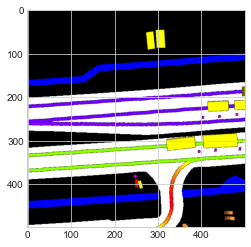

In [144]:
PlotInputRepresentation(instance_token, sample_token)

In [141]:
# Get start history snapshot's annotation
all_annotations = helper.get_past_for_agent(instance_token, sample_token, seconds=history_length, in_agent_frame=False, just_xy=False)
last_annotation = all_annotations[len(all_annotations) - 1]

start_history_annotation_token = last_annotation['token']

# Get last prediction snapshot's annotation
all_annotations = helper.get_future_for_agent(instance_token, sample_token, seconds=prediction_length, in_agent_frame=False, just_xy=False)
last_annotation = all_annotations[len(all_annotations) - 1]

finish_prediction_annotation_token = last_annotation['token']

Number of annotations: 17


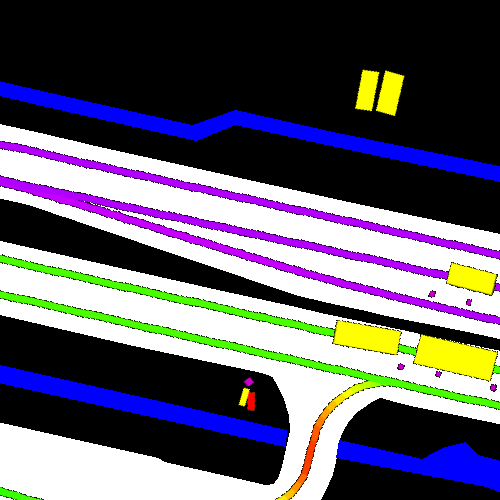

In [142]:
PlotInputRepresentationMap(start_history_annotation_token, finish_prediction_annotation_token)

Number of annotations: 17


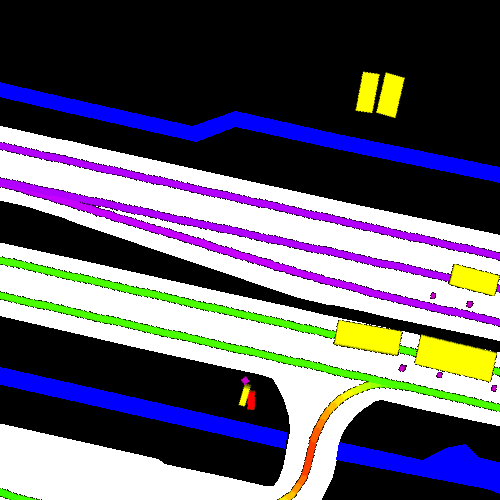

In [138]:
PlotInputRepresentationMap(start_history_annotation_token, finish_prediction_annotation_token)